#Computer Vision Assignment 3

Pragya Jaiswal (MDS202129)


[Did not form group for assignment]

## CheckerBoard Calibration


### Imports and data loading

In [1]:
# importing libraries
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)

In [2]:
# finding the folder of images on google drive
!rm *.jpg
!gdown --id 1z8x1YS8o0ieZAHoLvLlsCk9GpTnEwBEz
!unzip Chessboard.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z8x1YS8o0ieZAHoLvLlsCk9GpTnEwBEz
To: /content/Chessboard.zip
100% 1.57M/1.57M [00:00<00:00, 104MB/s]
Archive:  Chessboard.zip
  inflating: 0.jpg                   
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   
  inflating: 6.jpg                   
  inflating: 7.jpg                   
  inflating: 8.jpg                   
  inflating: 9.jpg                   


In [3]:
# Arrays to store object points and image points from all the images.
obj_points = [] # array of 3d point in real world space
img_pts = [] # array of 2d points in image plane.

# Reading images using glob. uses the glob module to retrieve a list of all 
#files with the .jpg extension in the current working directory. 
#The glob.glob() function returns a list of file names that match the given 
#pattern, in this case '*.jpg'

images = glob.glob('*.jpg')


# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

### Task 1

In [4]:
# Preparing object points
# The square size on the chessboard is 2.5cm x 2.4cm

obj_p = np.zeros((7*7,3), np.float32)
obj_p[:,:2] = np.mgrid[0:175:25,0:168:24].T.reshape(-1,2)
print('Object Points: ', obj_p, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 25.   0.   0.]
 [ 50.   0.   0.]
 [ 75.   0.   0.]
 [100.   0.   0.]
 [125.   0.   0.]
 [150.   0.   0.]
 [  0.  24.   0.]
 [ 25.  24.   0.]
 [ 50.  24.   0.]
 [ 75.  24.   0.]
 [100.  24.   0.]
 [125.  24.   0.]
 [150.  24.   0.]
 [  0.  48.   0.]
 [ 25.  48.   0.]
 [ 50.  48.   0.]
 [ 75.  48.   0.]
 [100.  48.   0.]
 [125.  48.   0.]
 [150.  48.   0.]
 [  0.  72.   0.]
 [ 25.  72.   0.]
 [ 50.  72.   0.]
 [ 75.  72.   0.]
 [100.  72.   0.]
 [125.  72.   0.]
 [150.  72.   0.]
 [  0.  96.   0.]
 [ 25.  96.   0.]
 [ 50.  96.   0.]
 [ 75.  96.   0.]
 [100.  96.   0.]
 [125.  96.   0.]
 [150.  96.   0.]
 [  0. 120.   0.]
 [ 25. 120.   0.]
 [ 50. 120.   0.]
 [ 75. 120.   0.]
 [100. 120.   0.]
 [125. 120.   0.]
 [150. 120.   0.]
 [  0. 144.   0.]
 [ 25. 144.   0.]
 [ 50. 144.   0.]
 [ 75. 144.   0.]
 [100. 144.   0.]
 [125. 144.   0.]
 [150. 144.   0.]]


### Task 2

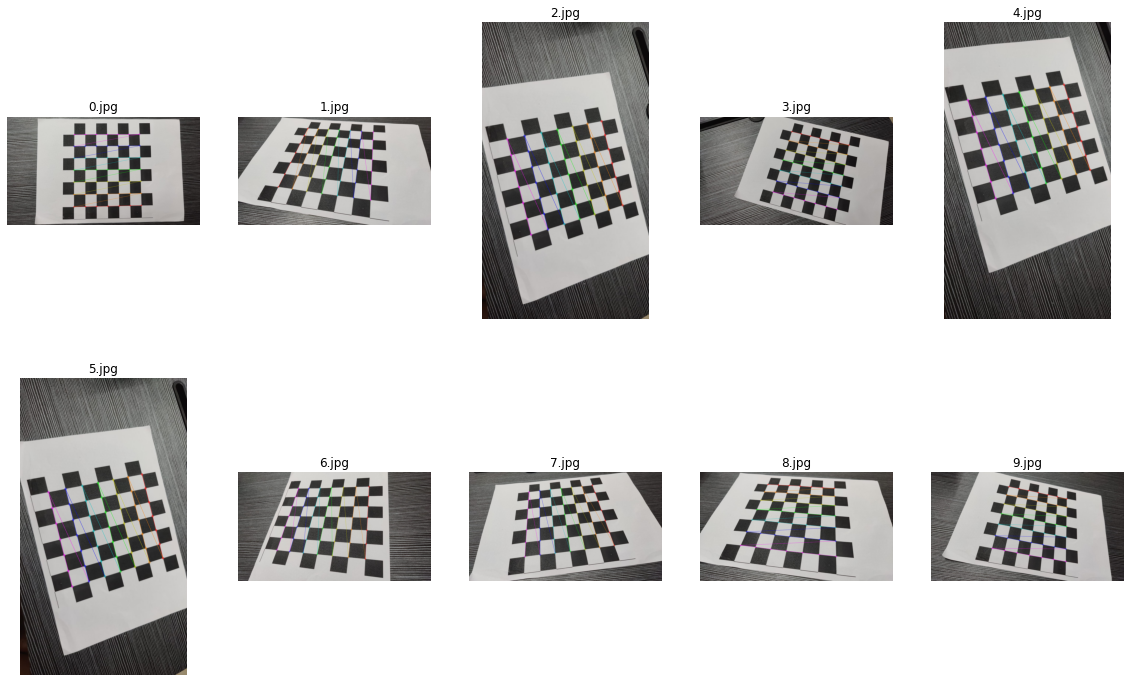

In [5]:
#removing axis 
fig, ax = plt.subplots(2,5)
for i in ax.flatten():
  i.axis('off')

for i, img_name in enumerate(images):
    img = cv2.imread(img_name) # Capture each image frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    #(7,7) as chessboard has 7,7 internal corners.

    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret:
        obj_points.append(obj_p)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        img_pts.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(img_name)
     

In [6]:
#print(obj_points)

### Task 3 -Calibration

In [7]:
# calibration
ret, cam_matrix, distortion, r_vec, t_vec = cv2.calibrateCamera(obj_points, img_pts, gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix :\n",cam_matrix, sep='\n', end='\n\n')
print("Lens Distortion Parameters:\n",distortion, sep='\n')


Intrinsic Camera Matrix :

[[798.5416   0.     766.9635]
 [  0.     845.9684 719.1647]
 [  0.       0.       1.    ]]

Lens Distortion Parameters:

[[ 0.0547 -0.2397 -0.0315 -0.0481  0.1627]]


### Task 4 - Reprojection Error

In [8]:
# Re-Projection Error
mean_err = 0
for i in range(len(obj_points)):
    img_pts2, _ = cv2.projectPoints(obj_points[i], r_vec[i], t_vec[i], cam_matrix, distortion)
    error = cv2.norm(img_pts[i], img_pts2, cv2.NORM_L2)/len(img_pts2)
    mean_err += error
print( "Total Reprojection error: ", mean_err/len(obj_points) )
     

Total Reprojection error:  0.749735988860784


## Task 5- DotGrid Calibration


### Loading Data and imports

In [9]:

!rm *.jpg
!gdown --id 1rov0xTpbmBSVm3JK67vTrEaIrKA2Fkhw
!unzip Dotgrid.zip
     

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rov0xTpbmBSVm3JK67vTrEaIrKA2Fkhw
To: /content/Dotgrid.zip
100% 417k/417k [00:00<00:00, 91.5MB/s]
Archive:  Dotgrid.zip
  inflating: 0.jpg                   
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   
  inflating: 6.jpg                   
  inflating: 7.jpg                   
  inflating: 8.jpg                   
  inflating: 9.jpg                   


In [11]:
# Arrays to store object points and image points from all the images.
obj_points = [] # 3d point in real world space
img_pts = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpg')
# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

### Task 5.1

In [10]:
# Setting up Blob Detector for the circles

# Setup SimpleBlobDetector parameters. 
blob_params = cv2.SimpleBlobDetector_Params() 

# Change thresholds 
blob_params.minThreshold = 8 
blob_params.maxThreshold = 255 

# Filter by Convexity 
blob_params.filterByConvexity = True 
blob_params.minConvexity = 0.87

# Filter by Circularity
blob_params.filterByCircularity = True 
blob_params.minCircularity = 0.1 

# Filter by Area. 
blob_params.filterByArea = True 
blob_params.minArea = 30
blob_params.maxArea = 2500 

# Filter by Inertia 
blob_params.filterByInertia = True 
blob_params.minInertiaRatio = 0.01 
blob_params.minDistBetweenBlobs = 2


# Create a detector with the parameters 
blob_det = cv2.SimpleBlobDetector_create(blob_params)

# Preparing object points
# The distance between the centres of the blobs is 2.2cm
obj_p = np.zeros((10*10,3), np.float32)
obj_p[:,:2] = np.mgrid[0:220:22,0:220:22].T.reshape(-1,2)

print('Object Points: ', obj_p, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 22.   0.   0.]
 [ 44.   0.   0.]
 [ 66.   0.   0.]
 [ 88.   0.   0.]
 [110.   0.   0.]
 [132.   0.   0.]
 [154.   0.   0.]
 [176.   0.   0.]
 [198.   0.   0.]
 [  0.  22.   0.]
 [ 22.  22.   0.]
 [ 44.  22.   0.]
 [ 66.  22.   0.]
 [ 88.  22.   0.]
 [110.  22.   0.]
 [132.  22.   0.]
 [154.  22.   0.]
 [176.  22.   0.]
 [198.  22.   0.]
 [  0.  44.   0.]
 [ 22.  44.   0.]
 [ 44.  44.   0.]
 [ 66.  44.   0.]
 [ 88.  44.   0.]
 [110.  44.   0.]
 [132.  44.   0.]
 [154.  44.   0.]
 [176.  44.   0.]
 [198.  44.   0.]
 [  0.  66.   0.]
 [ 22.  66.   0.]
 [ 44.  66.   0.]
 [ 66.  66.   0.]
 [ 88.  66.   0.]
 [110.  66.   0.]
 [132.  66.   0.]
 [154.  66.   0.]
 [176.  66.   0.]
 [198.  66.   0.]
 [  0.  88.   0.]
 [ 22.  88.   0.]
 [ 44.  88.   0.]
 [ 66.  88.   0.]
 [ 88.  88.   0.]
 [110.  88.   0.]
 [132.  88.   0.]
 [154.  88.   0.]
 [176.  88.   0.]
 [198.  88.   0.]
 [  0. 110.   0.]
 [ 22. 110.   0.]
 [ 44. 110.   0.]
 [ 66. 110.   0.]
 [ 88. 110. 

### Task 5.2

Number of images retained during blob detection:  10


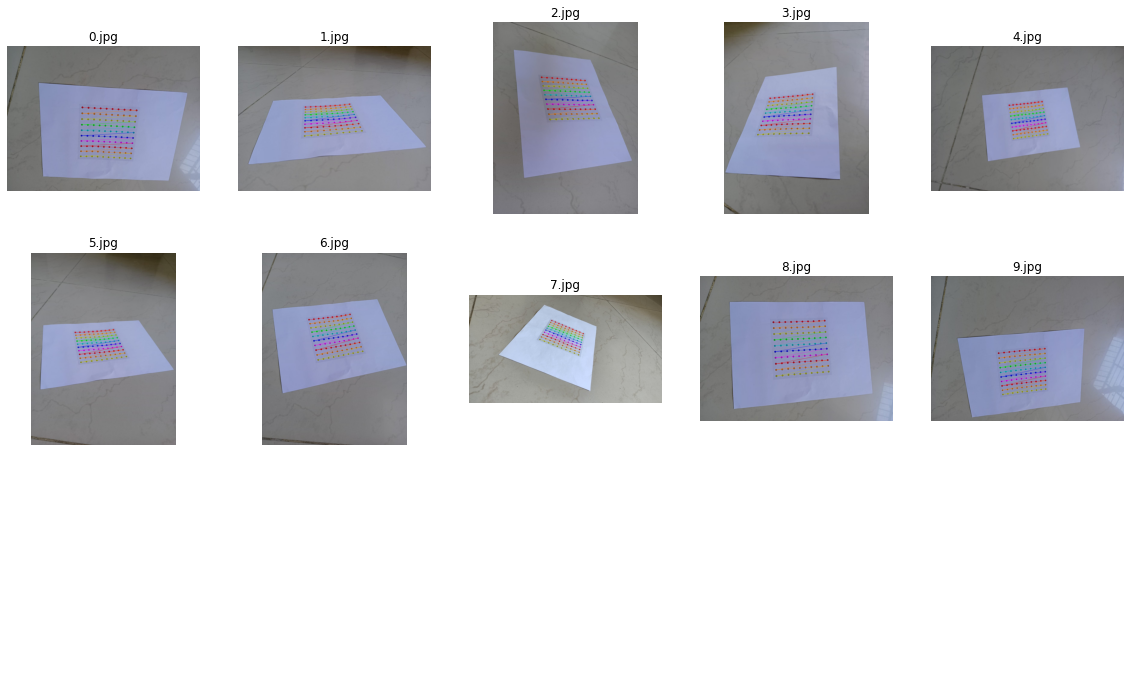

In [12]:
# Counter for images where corners were detected
retain = 0

fig, ax = plt.subplots(3,5)
for i in ax.flatten():
  i.axis('off')

for i, img_name in enumerate(images):
    img = cv2.imread(img_name) # Capture frame by frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting blobs
    keypoints = blob_det.detect(img)
    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    
    
    # Find the chess board corners
    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None,
                                      blobDetector = blob_det)
    
    # If found, add object points, image points (after refining them)
    if ret:
        obj_points.append(obj_p)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners,
                                    (11,11), (-1,-1), criteria)
        img_pts.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(img_name)

        retain+=1

print('Number of images retained during blob detection: ',retain)

### Task 5.3 - Calibration

In [13]:
# calibration
ret, cam_matrix, distortion, r_vec, t_vec = cv2.calibrateCamera(obj_points, img_pts, im_with_keypoints_gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",cam_matrix, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",distortion, sep='\n')

Intrinsic Camera Matrix:
[[1159.11      0.      633.6312]
 [   0.     1153.2155  437.5725]
 [   0.        0.        1.    ]]

Lens Distortion Parameters:
[[ 0.0601 -2.0485 -0.0181  0.0085  6.5533]]


### Task 5.4  - Reprojection Error

In [14]:
# Re-Projection Error
mean_err = 0
for i in range(len(obj_points)):
    img_pts2, _ = cv2.projectPoints(obj_points[i], r_vec[i], t_vec[i], cam_matrix, distortion)
    error = cv2.norm(img_pts[i], img_pts2, cv2.NORM_L2)/len(img_pts2)
    mean_err += error
print( "Total Reprojection error:", mean_err/len(obj_points) )

Total Reprojection error: 0.11088472344130192
